# .Student Marks Predictor

#Import The Required Library

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib 

#load the required dataset using Pandas library

In [2]:
df = pd.read_csv('E:\Machine Learning\data\student_info.csv', sep=',')

#now get Information of your Dataset

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


#Now time to Visualise your dataset using matplotlib inorder to decide the model to be used

Text(0.5, 1.0, 'Marks Predict')

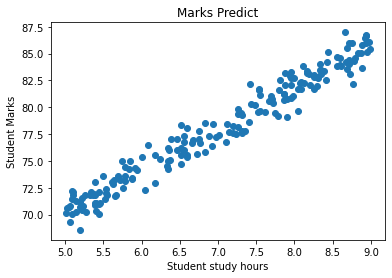

In [8]:
plt.scatter(x=df.study_hours , y=df.student_marks)
plt.xlabel("Student study hours")
plt.ylabel("Student Marks")
plt.title("Marks Predict")

#As we can see the Points are quite linear so we can go for Linear Regression Model

#Data Cleaning is the most important part inordered to train your model accurately
#Now check for NULL value in your dataset

In [9]:
print(df.isnull().sum())

study_hours      5
student_marks    0
dtype: int64


#So there are 5 empty column in Study__hours and 0 in study_marks
#So we have to fill all that Null value with Mean of data of that particular column

In [10]:
clean_df = df.fillna(df.mean())

In [12]:
print(clean_df.isnull().sum())

study_hours      0
student_marks    0
dtype: int64


#Now there is no empty blocks in our dataset, now dataset is Clean
#Now Split the dataset

In [13]:
X = clean_df.drop("student_marks", axis = "columns")
y = clean_df.drop("study_hours", axis = "columns")
print(X.shape,y.shape)

(200, 1) (200, 1)


#split test and train dataset
#here test_size is 0.2 that means we have alloted 20% of the data to test and rest 80% for Training purpose
#We are free to choose the size 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 51)

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#as it is Linear model so we use y=m*x+c(linear Line equation) 
#So basically in training process the model use to find the value of m and c

In [18]:
print(lr.coef_)
print(lr.intercept_)

[[3.93571802]]
[50.44735504]


#Congratulation now our model is good to go
#Now lets find out if someone study for 4 hours the marks obtain

In [19]:
print(lr.predict([[4]])[0][0].round(2))

66.19


#So our model predict that if a student study for 4 hrs a day then he\She might get 66.19 marks
#Now lets see how efficient our model is

In [21]:
y_pred = lr.predict(X_test)
final_data = pd.DataFrame(np.c_[X_test,y_test,y_pred], columns =["study_hours","student_marks_original","Student_mark_pred"])
final_data

,study_hours,student_marks_original,Student_mark_pred
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


#So now check the accuracy of our model

In [22]:
lr.score(X_test,y_test)

0.9514124242154464

#95.14% not bad
#Now let's save our model so that we don't have to train it every time

In [24]:
joblib.dump(lr,"Student_marks_predicor.pkl")

['Student_marks_predicor.pkl']

#Done
#Thank You😃